# Crop image maintaining aspect ratio

## Necessary imports

In [3]:
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import sys

## Load image

In [4]:
image = cv2.cvtColor(cv2.imread('image-1080x1920.jpg'), cv2.COLOR_BGR2RGB)
print(image.shape)

(1080, 1920, 3)


## Simple crop 

In [27]:
'''
Crop image starting from a chosen point (which of course should be within the bounds of given 
image's dimension) up to the max height and width

cropped_img = img[y:y+h, x:+w]
where w, h are the width and height respectively of the given image
'''

def crop_image(img, x, y, info=False):
    h, w, _ = img.shape
    if x < 0 or x > w or y < 0 or y > h:
        print('invalid points.. Try again!')
        sys.exit()
    if info:
        print('aspect ratio of original image: ', (h/w))
        print('shape of original image: ', img.shape)
    
    cropped_img = img[y:y+h, x:x+w]
    print()
    if info:
        print('aspect ratio of cropped image: ', (cropped_image.shape[0]/cropped_image.shape[1]))
        print('shape of cropped image: ', cropped_image.shape)
        
    return cropped_image

aspect ratio of original image:  0.5625
shape of original image:  (1080, 1920, 3)

aspect ratio of cropped image:  0.5697674418604651
shape of cropped image:  (980, 1720, 3)


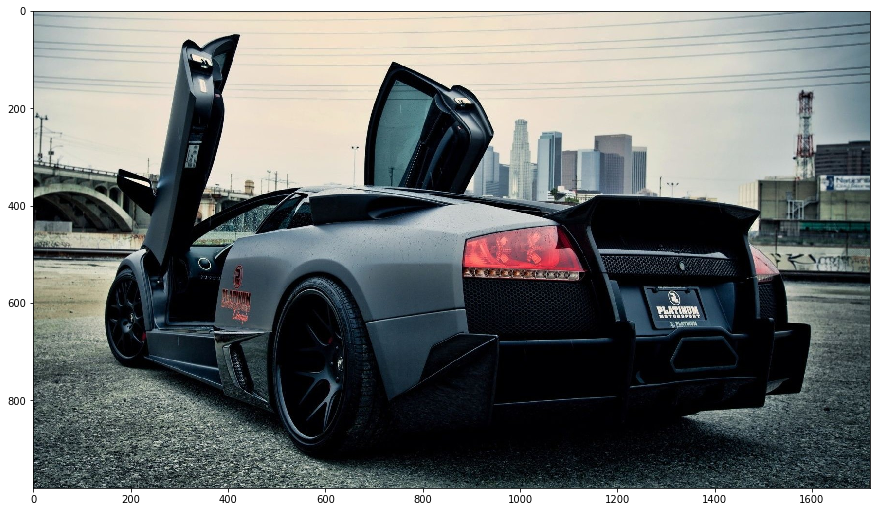

In [28]:
cropped_image = crop_image(image,200, 100, True)
plt.figure(figsize=(15, 20))
plt.imshow(cropped_image);

## Crop maintaining aspect ratio

In [16]:
def crop_maintaining_aspect_ratio(img, ratio, info=False):
    
    '''
    in x direction, go from x = 0, to x = width*(ratio)
    in y direction, go from y = height*(1-ratio) to y = height
    '''
    
    if info:
        print('aspect ratio of original image: ', (img.shape[0]/img.shape[1]))
        print('shape of original image: ', img.shape)
    
    ratio = float(ratio)
    if ratio == 0.0:
        print('invalid ratio provided... Try again!')
        sys.exit()
    
    
    h, w, _ = img.shape
    
    x = 0
    x_end = x+int(w*ratio)
    y = int(h*(1-ratio))
    y_end = h
    
    
    cropped_with_aspect = img[y:y_end, x:x_end]
    
    if info:
        print('aspect ratio of cropped_with_aspect: ', (cropped_with_aspect.shape[0]/cropped_with_aspect.shape[1]))
        print('shape of cropped_with_aspect: ', cropped_with_aspect.shape)
    return cropped_with_aspect

aspect ratio of original image:  0.5625
shape of original image:  (1080, 1920, 3)
aspect ratio of cropped_with_aspect:  0.5625
shape of cropped_with_aspect:  (756, 1344, 3)


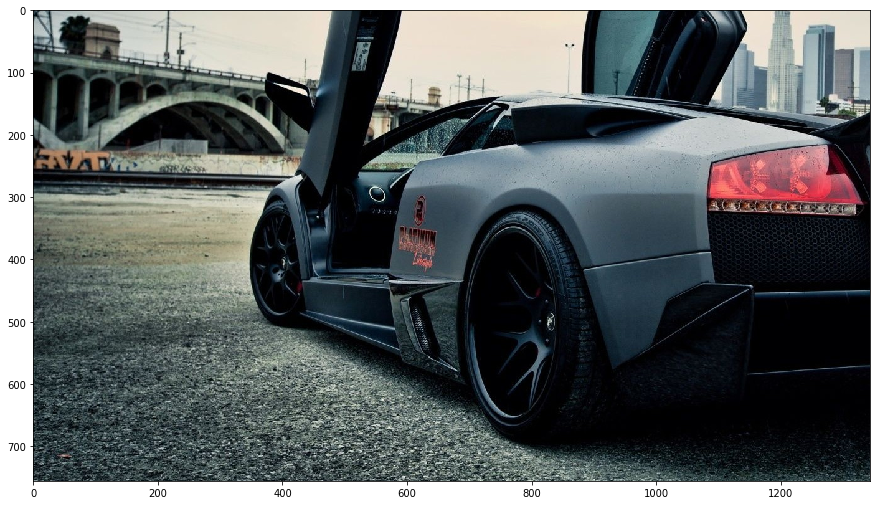

In [21]:
cp = crop_maintaining_aspect_ratio(image, ratio=0.7, info=True)
plt.figure(figsize=(15, 20))
plt.imshow(cp);